In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

다음의 캐글 노트북을 필사했습니다.  
https://www.kaggle.com/code/sudalairajkumar/simple-exploration-baseline-ga-customer-revenue

# 대회 설명  
80/20 규칙은 많은 비즈니스 전용(businesses-only)에 있어서 사실로 드러났습니다. 적은 비율의 고객들이 대부분의 이익을 생산한다는 것입니다. 이로써 마케팅 팀들은 홍보 전략으로 적절한 투자를 하기를 도전받습니다.  
  
이러한 관점에서 당신은 구글 머천다이즈 스토어의 고객 데이터셋으로 고객당 이익을 예측하는 것을 분석하기를 도전받습니다. 바라건대 결과가 더욱 실행 가능하며 기능적으로 변경 가능하고 GA 데이터 위에서 데이터 분석을 사용하는 회사들의 마케팅 예산을 더욱 잘 쓸 수 있도록 되길 바랍니다.

## Important Note  
우리는 지금 새로운 진보적인 문제 공식을 수행하기 위해 데이터를 업데이트 했습니다. 당신은 테스트 셋에 첨부된 모든 유저에 대해서 target을 예측해야 한다는 것을 기억하세요.(`test_v2.csv`) 고객들의 거래에 있어 미래 시간 기간인 2018년 12월 1일부터 2019년 1월 31일까지

불행하게도 시간 제약 때문에, 이 데이터의 BigQuery 버전이 당장 만들어지지 않을 것입니다.

### What should I expect the data format to be?  
train_v2.csv와 test_v2.csv 둘 다 아래의 데이터 필드들에 등록된 컬럼들을 가지고 있습니다. 데이터셋에 있는 각각의 행은 스토어에 방문한 사람입니다. 왜냐하면 우리가 유저당 전체 이익의 log를 예측하기 때문에, `test_v2.csv`에 있는 모든 row들이 submission의 모든 행들과 대응하지는 않을 것이라는 것을 알아두세요. 하지만 `fullVisitorId`는 submission의 모든 row와 대응할 것입니다.  
  
IMPORTANT: `fullVisitorId`의 설정으로 인해 모든 id들이 적절히 unique하기 위해서는 id들을 string으로 로드해야 합니다.  
    
다양한 깊이의 JSON blobs들이 포함된 여러 컬럼들이 있습니다. 이러한 JSON 컬럼들의 하나는 `totals`인데 이는 `transactionRevenue`의 sub-column이며 이는 우리가 예측하려고 하는 이익의 정보를 담고 있습니다. 이 sub-column은 오직 training data를 위해 존재합니다.

## What am I predicting?  
우리는 모든 유저당 거래의 합의 자연로그를 예측합니다. 데이터가 갱신되면 위에 언급했듯이 이는 `test_v2.csv`의 2018년 12월 1일부터 2019년 1월 31일까지의 모든 유저들일 것입니다. test set에 있는 모든 유저들에 대해서 타겟은 다음과 같습니다.

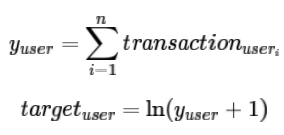

데이터셋은 2018년 12월 1일부터 2019년 1월 31일의 데이터를 포함하지 않는다는 것을 기억하세요. 당신은 제공된 test_v2.csv에 있는 고유한 `fullVisitorId`들을 밝혀내야 하며 이러한 관측되지 않은 달에 대해서 예측해야 합니다.

# File Descriptions  
* train_v2.csv - the updated training set - contains user transactions from August 1st 2016 to April 30th 2018. (2016년 8월 1일 - 2018년 4월 30일)  
* test_v2.csv - the updated test set - contains user transactions from May 1st 2018 to October 15th 2018. (2018년 5월 1일 - 2018년 11월 15일)  
* sample_submission_v2.csv - a updated sample sumission file in the correct format. Contains all `fullVisitorId`s in test_v2.csv. Your Submission's `PredictedLogRevenue` column should make forward-looking predictions for each of these `fullVisitorId`s for the timeframe of December 1st 2018 to January 31st 2019. Review "What am I predicting?" above for details.

## Data Fields  
fullVisitorId- A unique identifier for each user of the Google Merchandise Store.  
* channelGrouping - The channel via which the user came to the Store.  
* date - The date on which the user visited the Store.  
* device - The specifications for the device used to access the Store.  
* geoNetwork - This section contains information about the geography of the user.  
* socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".  
* totals - This section contains aggregate values across the session.  
* trafficSource - This section contains information about the Traffic Source from which the session originated.  
* visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.  
* visitNumber - The session number for this user. If this is the first session, then this is set to 1.  
* visitStartTime - The timestamp (expressed as POSIX time).  
* hits - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.  
* customDimensions - This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.  
* totals - This set of columns mostly includes high-level aggregate data.  

# Imports

In [2]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics
import lightgbm as lgb

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

필드의 일부가 json 형식으로 되어 있다는 것을 기억해야 합니다.  
  
다음의 커널 덕분에 파일에 있는 모든 json 필드를 다른 대회에서 일반적으로 사용하는 csv 형식으로 flttened할 수 있습니다.  
  
https://www.kaggle.com/code/julian3833/1-quick-start-read-csv-and-flatten-json-fields/notebook

In [3]:
# # 메모리 문제로 해당 커널 실행 불가.

# def load_df(csv_path = '../input/ga-customer-revenue-prediction/train.csv', nrows=None):
#     JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSouce']
    
#     df = pd.read_csv(csv_path,
#                      converters={column: json.loads for column in JSON_COLUMNS},
#                      dtype={'fullVisitorId': 'str'}, # Important!!
#                      nrows=nrows)
    
#     for column in JSON_COLUMNS:
#         column_as_df = json_normalize(df[column])
#         column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
#         df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
        
#     print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")

#     return df

In [4]:
# %%time
# train_df = load_df()
# test_df = load_df("'../input/ga-customer-revenue-prediction/test.csv'")

In [5]:
# # 데이터 로드
# csv_path = '../input/ga-customer-revenue-prediction/train.csv'

# temp_train = pd.read_csv(csv_path)

In [6]:
# temp_train.head()

json 파일의 형식에 대한 글  
https://www.delftstack.com/ko/howto/python-pandas/load-json-file-pandas/

In [7]:
# JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSouce']

In [8]:
# temp_df = pd.read_csv(csv_path,
#                       converters={'device': json.loads},
#                       nrows=None)

In [9]:
# temp_df.head()

In [10]:
# column_as_df = json_normalize(temp_df['device'])
# column_as_df.head()

In [11]:
# del column_as_df
# del temp_df
# del JSON_COLUMNS
# del temp_train

# import gc
# gc.collect

## json 파일 쪼개서 데이터프레임으로 변환

In [12]:
def load_df(csv_path='../input/ga-customer-revenue-prediction/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']

    df = pd.read_csv(csv_path, dtype={'fullVisitorId': 'str'}, nrows=nrows)

    for column in JSON_COLUMNS:
        df = df.join(pd.DataFrame(df.pop(column).apply(pd.io.json.loads).values.tolist(), index=df.index).add_prefix(column+"."))

    return df

In [13]:
# csv_path='../input/ga-customer-revenue-prediction/train.csv'
# JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource'

# df = pd.read_csv(csv_path, dtype={'fullVisitorId': 'str'}, nrows=None)

In [14]:
# df.head()

In [15]:
## json 파일이 딕셔너리 형태로 반환
# temp_df['device'].apply(pd.io.json.loads)

## 딕셔너리를 리스트 형식으로 변환
# temp_df['device'].apply(pd.io.json.loads).values.tolist()

## 'device'에 대한 json 형식이 딕셔너리 -> 컬럼의 형태로 쪼개져 데이터프레임 생성됨
# pd.DataFrame(df.pop('device').apply(pd.io.json.loads).values.tolist(), index=df.index).add_prefix('device'+".")

In [16]:
%%time
train_df = load_df()
test_df = load_df("../input/ga-customer-revenue-prediction/test.csv")

In [17]:
# 메모리 절약을 위해서 1/10 사이즈로 줄여 EDA 진행

train_df = train_df[::10]
test_df = test_df[::10]

In [18]:
print(train_df.shape, '\n', test_df.shape)

In [19]:
train_df.head()

## Target Variable Exploration
유저의 모든 거래에 대한 합의 자연로그를 예측하기 때문에 유저 레벨에서 거래 이익을 합하고 로그를 취한 다음 스캐터 플롯을 그립니다.

In [20]:
train_df.info()

In [21]:
train_df['totals.transactionRevenue'] = train_df['totals.transactionRevenue'].astype('float')
gdf = train_df.groupby('fullVisitorId')['totals.transactionRevenue'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf['totals.transactionRevenue'].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()
                  

해당 문구는 대회 overview의 두 줄입니다.  
  
80/20 규칙은 많은 businesses-only에서 적은 비율의 고객들이 대부분의 이익을 산출하는 것이 사실로 드러났습니다. 이로써 마케팅 팀은 홍보 전략에 있어서 적절한 투자를 해야 함을 도전받습니다.  
  
이러한 케이스에서 해당 비율은 심지어 낮습니다. (20퍼센트보다 더욱 적은 소수의 고객들이 대부분의 매출을 일으킨다는 뜻인 것 같음)

In [22]:
(gdf['totals.transactionRevenue']>0).sum()

In [23]:
# 매출 총액
nzi = pd.notnull(train_df['totals.transactionRevenue']).sum()

# 매출을 일으키는 고객들의 수
nzr = (gdf['totals.transactionRevenue']>0).sum()

print("Number of instances in train set with non-zero revenue: ", nzi, "and ratio is : ", nzi / train_df.shape[0])
print("Number of unique customers with non-zero revenue : ", nzr, "and the ratio is : ", nzr / gdf.shape[0])

따라서 이익이 없는 고객으로부터 산출된 이익의 비율은 1.3%입니다.  
대부분의 행이 제로가 아닌 수익을 가졌기 때문에 다음의 플롯은 수익이 제로가 아닌 요소의 수와 함께 변수의 각 카테고리의 개수를 살펴보도록 합니다.  
  
### Number of visitors and common visitors:  
이제 train과 test셋에 있는 고유한 방문객의 수와 흔한 고객들의 수를 살펴보겠습니다.

In [24]:
print("NUmber of unique visitors in train set : ", train_df.fullVisitorId.nunique(), " out of rows :", train_df.shape[0])

print("Number of unique visitors in test set : ", test_df.fullVisitorId.nunique(), " out of rows :", test_df.shape[0])

# train과 tst의 fullVisitorId.unique()가 교차하는 사람들의 수를 계산
print("Number of common visitirs in train and test set : ", len(set(train_df.fullVisitorId.unique()).intersection(set(test_df.fullVisitorId.unique())) ))

### Columns with constant values:
트레인 셋에는 상수값을 가지고 있는 피처가 꽤 있는 것 같습니다. 이러한 피처들의 리스트를 만들겠습니다. Svitlana가 아래의 코멘트에서 지적했듯이 결측치와 상수값을 가지는 컬럼들을 포함하지 않겠습니다.

In [25]:
train_df.head()

In [26]:
# # Expected 'str' or 'bytes' 오류메시지
# df = train_df.copy()
# df['trafficSource.adwordsClickInfo'].apply(pd.io.json.loads)
# del df

In [27]:
# const_cols = [c for c in temp_cols if train_df[c].nunique(dropna=False)==1 elif c == 'trafficSource.adwordsClickInfo' continue]
# const_cols

In [28]:
# temp_df = train_df.pop('trafficSource.adwordsClickInfo')

In [29]:
# empty_list = []

# empty_list += list(train_df['trafficSource.adwordsClickInfo'][0].keys())
# empty_list += list(train_df['trafficSource.adwordsClickInfo'][1].keys())

# empty_list

In [30]:
# train_df.shape

In [31]:
# # len이 903653개가 나와야 하는데 100만개 이상이 나옴

# key_list = []
# for num in range(0, train_df.shape[0]):
#     key_list += train_df['trafficSource.adwordsClickInfo'][num].keys()

# value_list = []
# for num in range(0, train_df.shape[0]):
#     value_list += train_df['trafficSource.adwordsClickInfo'][num].values()
    
# print(len(key_list), '\n', len(value_list))

In [32]:
# # train_df['trafficSource.adwordsClickInfo']에 key가 2개 이상인 경우가 있어서 변환이 안된 것 같음.

# count = 0

# for row in range(0, train_df.shape[0]):
#     if len(list(train_df['trafficSource.adwordsClickInfo'][row].keys())) > 1:
#         print(list(train_df['trafficSource.adwordsClickInfo'][row]))
#         count += 1
#     elif count ==10:
#         break

In [33]:
# len(list(train_df['trafficSource.adwordsClickInfo'][2].keys()))

In [34]:
# del key_list, value_list

In [35]:
# trafficSource.adwordsClickInfo 컬럼이 dict형태이기 때문에 변환이 안되는 것 같음 따라서 이를 제외했음
const_cols = []

for c in train_df.columns:
    # 컬럼이 trafficSource.adwordsClickInfo이면 무시한다
    if c == 'trafficSource.adwordsClickInfo':
        continue
    # 컬럼이 하나의 값(상수)을 가지면 리스트에 추가
    elif train_df[c].nunique(dropna=False)==1:
        const_cols.append(c)

원래 노트북에서는 "trafficSource.canpaignCode"가 상수가 아니지만 본 노트북에서는 사이즈를 1/10으로 줄였기 때문에 상수 list에 포함되었습니다. 따라서 이를 다시 포함시켜 줍니다.

In [36]:
# 원래 노트북의 const 컬럼과 해당 노트북의 const_column 비교

list1 = ['socialEngagementType',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

list2 = const_cols

print(len(list1), len(list2))

In [37]:
set(list1).difference(list2)

In [38]:
set(list2).difference(list1)

In [39]:
const_cols = list1
const_cols

In [40]:
print(train_df.shape, test_df.shape)

In [41]:
train_df.head()

In [42]:
test_df.head()

In [43]:
# trafficSource .adwordsClickInfo 변환이 안돼서 다시 변환 후 join
join_df = json_normalize(train_df['trafficSource.adwordsClickInfo'])
join_df.columns = ["trafficSource.adwordsClickInfo."+f"{subcolumn}" for subcolumn in join_df.columns]
join_df.head()

join_df2 = json_normalize(test_df['trafficSource.adwordsClickInfo'])
join_df2.columns = ["trafficSource.adwordsClickInfo."+f"{subcolumn}" for subcolumn in join_df2.columns]

In [44]:
print(join_df.shape, join_df2.shape)

In [45]:
# 기존에는 train_df의 index가 10, 20, ... 이런 형식으로 돼있어서 join이
train_df = train_df.reset_index()
train_df.drop('index', axis=1)
train_df.head()

test_df = test_df.reset_index()
test_df.drop('index', axis=1)
test_df.head()

In [46]:
train_df = train_df.drop('trafficSource.adwordsClickInfo', axis=1).merge(join_df, right_index=True, left_index=True)
test_df = test_df.drop('trafficSource.adwordsClickInfo', axis=1).merge(join_df2, right_index=True, left_index=True)

In [47]:
import gc
del join_df, join_df2

gc.collect()

이들은 꽤 많습니다. 변수가 상수이기 때문에 이들을 그냥 drop한 다음 모델링 프로세스에서 시간과 메모리를 절약할 수 있습니다.

In [48]:
def horizontal_bar_chart(cnt_srs, color):
    trace = go.Bar(
                    y=cnt_srs.index[::-1],
                    x=cnt_srs.values[::-1],
                    showlegend=False,
                    orientation = 'h',
                    marker=dict(color=color,),
                    )
    return trace

# Device Browser
cnt_srs = train_df.groupby('device.browser')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count"].head(10), 'rgba(50, 171, 96, 0.6)')
trace2 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), 'rgba(50, 171, 96, 0.6)')
trace3 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'rgba(50, 171, 96, 0.6)')

# Device Category
cnt_srs = train_df.groupby('device.deviceCategory')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace4 = horizontal_bar_chart(cnt_srs["count"].head(10), 'rgba(71, 58, 131, 0.8)')
trace5 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), 'rgba(71, 58, 131, 0.8)')
trace6 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'rgba(71, 58, 131, 0.8)')

# Operating system
snt_srs = train_df.groupby('device.operatingSystem')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
snt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace7 = horizontal_bar_chart(cnt_srs["count"].head(10), 'rgba(246, 78, 139, 0.6)')
trace8 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), 'rgba(246, 78, 139, 0.6)')
trace9 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'rgba(246, 78, 139, 0.6)')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=3, vertical_spacing=0.04,
                          subplot_titles=["Device Browser - Count", "Device Browser - Non-zero Revenue Count", "Device Browser - Mean Revenue",
                                          "Device Category - Count", "Device Category - Non-zero Revenue Count", "Device Category - Mean Revenue",
                                          "Device OS - Count", "Device OS - Non-zero Revenue Count", "Device OS - Mean Revenue"])


fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)
fig.append_trace(trace7, 3, 1)
fig.append_trace(trace8, 3, 2)
fig.append_trace(trace9, 3, 3)

fig['layout'].update(height=1200, width = 1200, paper_bgcolor='rgb(233, 233, 233)', title="Device Plots")
py.iplot(fig, filename='device-plots')

추론:  
* Device browser의 분포는 count와 count of non-zero revenue 두 플롯이 비슷해 보입니다.  
* device category 전면에서 desktop은 mobile과 비교했을 때 non-zero revenue counts가 높은 비율을 차지하는듯 보입니다.  
* device operating system에서 windows의 counts의 수가 더 많음에도 불구하고 revenue is not zero에서의 counts의 수가 Macintosh보다 많습니다.  
* Crome OS는 non-zero revenue counts의 비율이 높습니다.  
* mobile OS side에서 IOS는 Android와 비교했을 때 non-zero revenue counts의 비율이 더욱 높습니다.

## Date Explotration

In [49]:
type(train_df['date'][0])

In [50]:
train_df['date'][0]

코드 설명:  
train_df['date']을 2016, 09, 02로 분리한 후 int로 변환, 그리고 데이터 타입을 datetime으로 변경

In [51]:
import datetime

def scatter_plot(cnt_srs, color):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        showlegend=False,
        marker=dict(
            color=color,
        ),
    )
    return trace

# train_df['date'] = train_df['date'].apply(lambda x: datetime.date(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:])))
train_df['date'] = train_df['date'].apply(lambda x: datetime.date(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:])))
cnt_srs = train_df.groupby('date')['totals.transactionRevenue'].agg(['size', 'count'])
cnt_srs.columns = ["count", "count of non-zero revenue"]
cnt_srs = cnt_srs.sort_index()
#cnt_srs.index = cnt_srs.index.astype('str')
trace1 = scatter_plot(cnt_srs["count"], 'red')
trace2 = scatter_plot(cnt_srs["count of non-zero revenue"], 'blue')

fig = tools.make_subplots(rows=2, cols=1, vertical_spacing=0.08,
                          subplot_titles=["Date - Count", "Date - Non-zero Revenue count"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig['layout'].update(height=800, width=800, paper_bgcolor='rgb(233,233,233)', title="Date Plots")
py.iplot(fig, filename='date-plots')

추론:  
* 2016년 8월 1일부터 2017년 7월 31일 까지의 training dataset이 있습니다.  
* 2016년 11월에 방분자 수의 증가가 있기는 하지만 해당 기간에 non-zero revenue counts의 증가는 없습니다.

In [52]:
test_df['date'] = test_df['date'].apply(lambda x: datetime.date(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:])))
cnt_srs = test_df.groupby('date')['fullVisitorId'].size()

trace = scatter_plot(cnt_srs, 'red')

layout = go.Layout(
    height=400,
    width=800,
    paper_bgcolor='rgb(233,233,233)',
    title='Dates in Test set')

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="ActivationDate")

테스트 셋에서는 2017년 8월 2일부터 2018년 4월 30일 까지의 데이터가 있습니다. 따라서 train과 test셋 사이에는 공통적인 날짜가 없습니다. 그래서 이 데이터 셋에서 시간 기반의 validation을 하는 것은 좋은 아이디어 같습니다.

## Geographic Information

In [53]:
train_df['geoNetwork.continent'].unique()

In [54]:
train_df['geoNetwork.subContinent'].unique()

In [55]:
train_df['geoNetwork.networkDomain'].unique()

In [56]:
# Continent
cnt_srs = train_df.groupby('geoNetwork.continent')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count"].head(10), 'rgba(58, 71, 80, 0.6)')
trace2 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), 'rgba(58, 71, 80, 0.6)')
trace3 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'rgba(58, 71, 80, 0.6)')

# SUb-continent
cnt_srs = train_df.groupby('geoNetwork.subContinent')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace4 = horizontal_bar_chart(cnt_srs["count"], 'orange')
trace5 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"], 'orange')
trace6 = horizontal_bar_chart(cnt_srs["mean"], 'orange')

# Network domain
cnt_srs = train_df.groupby('geoNetwork.networkDomain')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by = "count", ascending=False)
trace7 = horizontal_bar_chart(cnt_srs["count"].head(10), 'blue')
trace8 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), 'blue')
trace9 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=3, vertical_spacing=0.08, horizontal_spacing=0.15,
                          subplot_titles=["Continent - Count", "Continent - Non-zero Revenue Count", "Continent - Mean Revenue",
                                          "Sub Contienet - Count", "Sub Continent - Non-zero Revenue Count", "Sub Continent - Mean Revenue",
                                          "Network Domain - Count", "Network Domain - Non-zero Revenue Count", "Network Domain - Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)
fig.append_trace(trace7, 3, 1)
fig.append_trace(trace8, 3, 2)
fig.append_trace(trace9, 3, 3)

fig['layout'].update(height=1500, width=1200, paper_bgcolor='rgb(233,233,233)', title="Geography Plots")
py.iplot(fig, filename='geo-plots')

추론:  
* continent 플롯에서 America가 counts의 수 뿐만 아니라 revenue is non-zaro에서 최고로 높은 것을 볼 수 있습니다.  
* 유럽과 아시아가 counts의 수가 높긴 하지만 해당 대륙에서의 non-zero revenue counts는 상대적으로 낮습니다.  
* sub-continents의 첫 번째 두 포인트도 추론할 수 있습니다.  
* network domain이 "(not set)" 이 아니고 "unknwon.unknown"이면 non-zero revenue의 수가 낮은 경향이 있습니다.

## Traffic Source

In [57]:
train_df.head()

In [58]:
selected_columns = []

for col in train_df.columns:
    if "trafficSource" in col:
        selected_columns.append(col)
        
selected_columns

In [59]:
train_df[selected_columns].head()

In [60]:
# Continent
cnt_srs = train_df.groupby('trafficSource.source')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count"].head(10), 'green')
trace2 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), 'green')
trace3 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'green')

# Sub-continent
cnt_srs = train_df.groupby('trafficSource.medium')['totals.transactionRevenue'].agg(['size', "count", "mean"])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace4 = horizontal_bar_chart(cnt_srs["count"], 'purple')
trace5 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"], 'purple')
trace6 = horizontal_bar_chart(cnt_srs["mean"], 'purple')

# Creating two subplots
fig = tools.make_subplots(rows=2, cols=3, vertical_spacing=0.08, horizontal_spacing=0.15,
                           subplot_titles=["Traffic Source - Count", "Traffic Source - Non-zero Revenue Count", "Traffic Source - Mean Revenue",
                                           "Traffic Source Medium - Count", "Traffic Source Medium - Non zero Revenue Count", "Traffic Source Medium - Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)

fig['layout'].update(height=1000, width=1200, paper_bgcolor='rgb(233,233,233)', title="Traffic Source Plots")
py.iplot(fig, filename='traffic-source-plots')

추론:  
* traffic source plot을 보면 해당 데이터셋에서 Youtube가 많은 카운트 수를 가지고 있기는 하지만 non-zero revenue counts는 매우 낮습니다.  
* Google plex는 traffic source plot의 총 개수 대비 매우 높은 non-zero revenue count 비율을 갖습니다.  
* traffic source medium에서 "referral"은 "organic" medium(매체)에 비해서 더욱 좋은 non-zero revenue count의 수를 가지고 있습니다.

## Visitor Profile
방문자의 pageviews 수, 방문자의 hits 수와 같은 visitor profile을 볼 것이며 이들이 어떻게 보이는지 확인할 것입니다.

In [61]:
column_list = []

for col in train_df.columns:
    if "pageviews" in col:
        column_list.append(col)

column_list

In [62]:
train_df[column_list].head()

In [63]:
# Page views
cnt_srs = train_df.groupby('totals.pageviews')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(60), 'cyan')
trace2 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(60), 'cyan')
trace5 = horizontal_bar_chart(cnt_srs["mean"].head(60), 'cyan')

# Hits
cnt_srs = train_df.groupby('totals.hits')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", 'mean']
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace3 = horizontal_bar_chart(cnt_srs["count"].head(60), 'black')
trace4 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(60), 'black')
trace6 = horizontal_bar_chart(cnt_srs["mean"].head(60), 'black')

# Creating two subplots
fig = tools.make_subplots(rows=2, cols=3, vertical_spacing=0.08, horizontal_spacing=0.15, 
                          subplot_titles=["Total Pageviews - Count", "Total Pageviews - Non-zero Revenue Count", "Total Pageviews - Mean Revenue",
                                          "Total Hits - Count",  "Total Hits - Non-zero Revenue Count", "Total Hits - Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace5, 1, 3)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)
fig.append_trace(trace6, 2, 3)

fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Visitor Profile Plots")
py.iplot(fig, filename='visitor-profile-plots')

추론:  
* 위와 같은 변수들은 매우 예측 가능한 것 같습니다.  
* Count plot은 자연적으로 감소함을 보입니다. 즉, 방문자 거래당 조회수 및 페이지뷰 수가 적기 때문에 토탈 카운트가 매우 높고 방문자 거래당 조회수가 증가하면 전체 카운트가 감소합니다.  
* 반면에 방문자 거래당 조회수/페이지뷰 수가 증가할 때 많은 수의 non-zero revenue counts를 확실하게 볼 수 있습니다.

## Baseline Model
이제 해당 데이터셋에 대해서 베이스라인 모델을 만들겠습니다. 모델을 만드는 것을 시작하기 전에 train dataset과 test dataset에 있지 않은 변수들의 이름을 살펴보겠습니다.

In [64]:
print(train_df.shape, test_df.shape)

In [65]:
train_df.head()

In [66]:
print("Variables not in test but in train : ", set(train_df.columns).difference(set(test_df.columns)), "\n\n", "count of them :", len(set(train_df.columns).difference(set(test_df.columns))))

따라서 target 변수와는 별개로 하나의 변수가 더 있습니다.  
"trafficSource.campaignCode"는 테스트 데이터셋에 존재하지 않습니다. 따라서 모델을 만드는 동안 해당 변수를 제거해야 합니다. 또한 이전에 수행했던 상수 변수들을 제거할 수 있습니다.  
  
또한 "sessionId"를 제거할 수 있는데, 이는 방문의 고유한 식별자이기 때문입니다.

In [67]:
cols_to_drop = const_cols + ['sessionId']

train_df = train_df.drop(cols_to_drop + ["trafficSource.campaignCode"], axis=1)
test_df = test_df.drop(cols_to_drop, axis=1)

이제 모델을 만드는 시간에 기반해서 밸리데이션 splits와 개발을 하겠습니다. 검증(validation)의 샘플로써 마지막 두 달을 취할 수 있습니다.

In [68]:
train_df.info()

In [69]:
cat_cols = list(train_df.select_dtypes('object').columns)
cat_cols += (list(train_df.select_dtypes('bool').columns))
len(cat_cols)

In [70]:
# 원래 노트북의 trafficSource 컬럼이랑 지금 노트북의 trafficSource 비교
origin_trafficsource_list = ['trafficSource.adContent',
'trafficSource.adwordsClickInfo.adNetworkType',
'trafficSource.adwordsClickInfo.gclId',
'trafficSource.adwordsClickInfo.page',
'trafficSource.adwordsClickInfo.slot',
'trafficSource.campaign',
'trafficSource.keyword',
'trafficSource.medium',
'trafficSource.referralPath',
'trafficSource.source',
'trafficSource.adwordsClickInfo.isVideoAd',
'trafficSource.isTrueDirect']


col_list = []
for col in train_df.columns:
    if 'trafficSource' in col:
        col_list.append(col)

set(col_list).difference(set(origin_trafficsource_list))

In [71]:
# trafficSource.adwordsClickInfo 타입 컬럼 쪽에서 오류 발생.
# 원래는 criteriaparameters가 없는 것 같음

# Impute 0 for missing target values
train_df['totals.transactionRevenue'].fillna(0, inplace=True)
train_y = train_df['totals.transactionRevenue'].values
train_id = train_df['fullVisitorId'].values
test_id = test_df['fullVisitorId'].values

# label encode the categorical variables and convert the numerical variables to float
for col in cat_cols:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_df[col].values.astype('str')) + list(test_df[col].values.astype('str')))
    train_df[col] = lbl.transform(list(train_df[col].values.astype('str')))
    test_df[col] = lbl.transform(list(test_df[col].values.astype('str')))
    
num_cols = list(train_df.select_dtypes('int64').columns)
for col in num_cols:
    train_df[col] = train_df[col].astype(float)
    test_df[col] = test_df[col].astype(float)